#Connecting to Google-Drive

In [ ]:
from google.colab import drive
drive.mount('./gdrive')

Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!ls "/content/gdrive/MyDrive/Nikesh_Web_Clawer"

Test.csv  Train.csv


In [20]:
!ls "/content/drive/MyDrive/Nikesh_Web_Clawer"

Test.csv  Train.csv


#Making a Directory

In [21]:
!cp /content/drive/MyDrive/Nikesh_Web_Clawer /content -r

#Importing Required Libraries

In [22]:
import numpy as np
import pandas as pd


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline


import pickle

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

#Initial Data Preprocessing

In [27]:
paperDf = pd.read_csv("/content/drive/MyDrive/Nikesh_Web_Clawer/Train.csv")
paperDf

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13999,8699,a methodology of automatic detection of a even...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14000,11912,we consider a case inside which the robot has ...,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
14001,4842,despite being usually considered two competing...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
14002,12507,we present the framework and its implementatio...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Converting one hot encoding to label encoding

In [28]:
def convertOneHotToLabel(df):
    labels = []

    cols = df.columns[2:]

    for ind, row in df.iterrows():

        for ind, val in enumerate(cols):
            if row[val] == 1:
                labels.append(val)
                break

    df['subject'] = labels

convertOneHotToLabel(paperDf)

paperDf.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control,subject
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Physics
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Computer Science
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Physics
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Physics
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Computer Science


#Removing all columns inbetween

In [29]:
newDf = paperDf.drop(paperDf.columns[2:-1], axis = 1)
newDf.drop('id', axis = 1, inplace = True)
newDf.to_csv("/content/drive/MyDrive/Nikesh_Web_Clawer/label-encode.csv", index=False)

newDf

,ABSTRACT,subject
0,a ever-growing datasets inside observational a...,Physics
1,we propose the framework considering optimal $...,Computer Science
2,nanostructures with open shell transition meta...,Physics
3,stars are self-gravitating fluids inside which...,Physics
4,deep neural perception and control networks ar...,Computer Science
...,...,...
13999,a methodology of automatic detection of a even...,Computer Science
14000,we consider a case inside which the robot has ...,Computer Science
14001,despite being usually considered two competing...,Physics
14002,we present the framework and its implementatio...,Computer Science


#Working with new dataset

In [30]:
paperDf = pd.read_csv("/content/drive/MyDrive/Nikesh_Web_Clawer/label-encode.csv")
# paperDf.drop('id', axis = 1, inplace = True)
paperDf

,ABSTRACT,subject
0,a ever-growing datasets inside observational a...,Physics
1,we propose the framework considering optimal $...,Computer Science
2,nanostructures with open shell transition meta...,Physics
3,stars are self-gravitating fluids inside which...,Physics
4,deep neural perception and control networks ar...,Computer Science
...,...,...
13999,a methodology of automatic detection of a even...,Computer Science
14000,we consider a case inside which the robot has ...,Computer Science
14001,despite being usually considered two competing...,Physics
14002,we present the framework and its implementatio...,Computer Science


#Pipeline for stemming

In [31]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.pipeline import TransformerMixin
from sklearn.base import BaseEstimator
import numpy as np
import spacy
from sklearn.base import BaseEstimator, TransformerMixin
nltk.download('stopwords')
nltk.download('punkt')

class Lemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        lemmatized_text = []
        for text in X:
            content = re.sub('[^a-zA-Z]',' ', text)
            content = content.lower().split()
            # content = [self.port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]

            content = [word for word in content if text not in stopwords.words('english')]
            content = ' '.join(content)

            lemmas = [token.lemma_ for token in self.nlp(content)]
            lemmatized_text.append(" ".join(lemmas))
        return lemmatized_text

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

class Stemmer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.port_stem = PorterStemmer()
        

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        stemmed_X = []

        for content in X:
            stemmed_content = re.sub('[^a-zA-Z]',' ',content)
            stemmed_content = stemmed_content.lower()
            stemmed_content = stemmed_content.split()
            stemmed_content = [self.port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
            stemmed_content = ' '.join(stemmed_content)
            stemmed_X.append(stemmed_content)
        return np.asarray(stemmed_X)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [32]:
%%timeit
Lemmatizer().fit_transform([newDf['ABSTRACT'][0]])

598 ms ± 58.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%%timeit
Stemmer().fit_transform([newDf['ABSTRACT'][0]])

24.2 ms ± 717 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#Since Stemming processed faster than Lemmatizing, we will use stemming

In [34]:
newDf['stem_abstract'] = Stemmer().fit_transform(newDf['ABSTRACT'])
newDf

,ABSTRACT,subject,stem_abstract
0,a ever-growing datasets inside observational a...,Physics,ever grow dataset insid observ astronomi chall...
1,we propose the framework considering optimal $...,Computer Science,propos framework consid optim match exclud pre...
2,nanostructures with open shell transition meta...,Physics,nanostructur open shell transit metal molecula...
3,stars are self-gravitating fluids inside which...,Physics,star self gravit fluid insid pressur buoyanc r...
4,deep neural perception and control networks ar...,Computer Science,deep neural percept control network like key c...
...,...,...,...
13999,a methodology of automatic detection of a even...,Computer Science,methodolog automat detect event basi inform op...
14000,we consider a case inside which the robot has ...,Computer Science,consid case insid robot navig insid unknown en...
14001,despite being usually considered two competing...,Physics,despit usual consid two compet phenomena charg...
14002,we present the framework and its implementatio...,Computer Science,present framework implement reli natur languag...


In [35]:
newDf.to_csv("/content/drive/MyDrive/Nikesh_Web_Clawer/label-encode.csv", index=False)

#Splitting data into X and Y

In [36]:
X = newDf['stem_abstract']
X[:10]

0    ever grow dataset insid observ astronomi chall...
1    propos framework consid optim match exclud pre...
2    nanostructur open shell transit metal molecula...
3    star self gravit fluid insid pressur buoyanc r...
4    deep neural percept control network like key c...
5    analyz job hop behavior import consid understa...
6    need reason uncertainti insid larg complex mul...
7    period approxim one central topic insid astron...
8    nowaday data compressor appli mani problem tex...
9    insid work mani bodi potenti nb consid radiat ...
Name: stem_abstract, dtype: object

#label encoding Y

In [37]:
lc = LabelEncoder()
Y = lc.fit_transform(paperDf['subject'])

print("Labelled classes ", lc.classes_)
Y[:10]

Labelled classes  ['Computer Science' 'Mathematics' 'Physics' 'Statistics']


array([2, 0, 2, 2, 0, 0, 3, 2, 0, 2])

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
print(f"Train size : {len(X_train)}")
print(f"Test size : {len(X_test)}")


Train size : 10503
Test size : 3501


In [39]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)

X_train_vec


<10503x22190 sparse matrix of type '<class 'numpy.float64'>'
	with 730224 stored elements in Compressed Sparse Row format>

In [40]:
df2 = pd.DataFrame(X_train_vec.toarray().transpose(),
                   index=vectorizer.get_feature_names_out())

print(f"Number of features : {df2.shape[1]}")
df2

Number of features : 10503


,0,1,2,3,4,5,6,7,8,9,...,10493,10494,10495,10496,10497,10498,10499,10500,10501,10502
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aachen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aalen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwittterion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zygmund,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zywina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [42]:
!mkdir -p /content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification

In [43]:
# save vectorizer
with open("/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/vectorizer.pkl", "wb") as f:
    f.write(pickle.dumps(vectorizer))


# Model Testing 

In [44]:
# model metrics
import pickle

def loadModels(modelPath, vectorizerPath):
    with open(modelPath, "rb") as f:
        model = pickle.load(f)

    with open(vectorizerPath, "rb") as f:
        vectorizer = pickle.load(f)
    return model, vectorizer

def showMetrics(testData, truths, model):

    preds = model.predict(testData)
    cm = confusion_matrix(truths, preds)

    names = ['Computer Science', 'Mathematics', 'Physics', 'Statistics']

    print("Prediction Sample : ", preds)

    print("Confusion Matrix")
    print(cm)
    print("Classification report")
    print(classification_report(truths, preds) )

    print("\nAccuracy : ", accuracy_score(truths, preds))
    print("Precision : ", precision_score(truths, preds, average='micro'))
    print("Recall : ", recall_score(truths, preds, average='micro'))
    
    # plt.figure(figsize=(12, 12))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap="crest", xticklabels=names, yticklabels=names)
    
    ax.set(title = "HeatMap of Predictions", xlabel="Predicted", ylabel="Truth")
    
    # ax.set_xticklabels(names)
    # ax.set_yticklabels(names)

    plt.show()

def predictSubject(X_test, y_test, modelPath, vectorizerPath):
    model, vectorizer = loadModels(modelPath, vectorizerPath)

    stemmed_data = Stemmer().fit_transform(X_test)
    X = vectorizer.transform(stemmed_data.astype('U'))
    
    if y_test is not None:
        showMetrics(X, y_test, model)  
    
def predictUnseen(data, modelPath, vectorizerPath):
    model, vectorizer = loadModels(modelPath, vectorizerPath)

    stemmed_data = Stemmer().fit_transform(data)
    X = vectorizer.transform(stemmed_data.astype('U'))

    return model.predict(X)    




#Random Forest Classieier

In [45]:
# create a custom sklearn model
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()
randomForest.fit(X_train_vec, y_train)

with open("/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/forest.pkl", "wb") as f:
    f.write(pickle.dumps(randomForest))

randomForest

RandomForestClassifier()

Prediction Sample :  [0 2 2 ... 0 0 0]
Confusion Matrix
[[1420   35    8    2]
 [ 125  463   16    5]
 [  46   11  884    1]
 [ 457   11    5   12]]
Classification report
              precision    recall  f1-score   support

           0       0.69      0.97      0.81      1465
           1       0.89      0.76      0.82       609
           2       0.97      0.94      0.95       942
           3       0.60      0.02      0.05       485

    accuracy                           0.79      3501
   macro avg       0.79      0.67      0.66      3501
weighted avg       0.79      0.79      0.74      3501


Accuracy :  0.7937732076549557
Precision :  0.7937732076549557
Recall :  0.7937732076549557


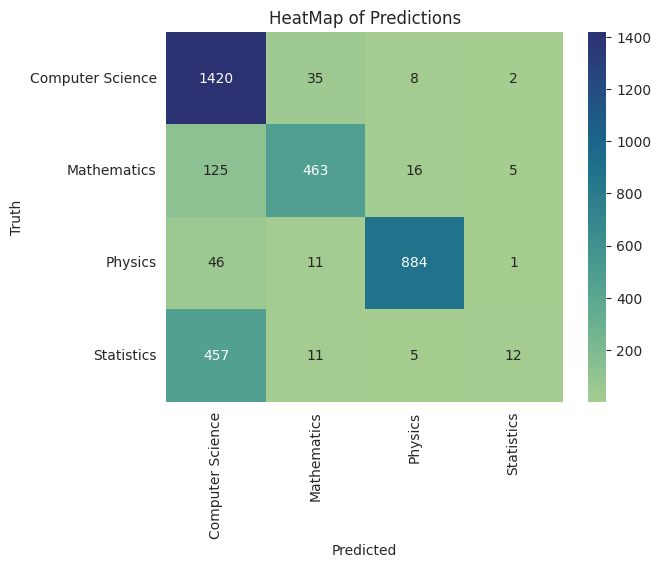

In [46]:
predictSubject(X_test, y_test, 
            "/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/forest.pkl",
            "/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/vectorizer.pkl")

In [47]:
# create a custom sklearn pipeline
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train_vec, y_train)

with open("/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/svm.pkl", "wb") as f:
    f.write(pickle.dumps(svm))

svm

SVC()

Prediction Sample :  [0 2 2 ... 1 0 0]
Confusion Matrix
[[1377   41    9   38]
 [  63  501   11   34]
 [  25    6  906    5]
 [ 319   24    4  138]]
Classification report
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1465
           1       0.88      0.82      0.85       609
           2       0.97      0.96      0.97       942
           3       0.64      0.28      0.39       485

    accuracy                           0.83      3501
   macro avg       0.82      0.75      0.76      3501
weighted avg       0.83      0.83      0.82      3501


Accuracy :  0.8346186803770351
Precision :  0.8346186803770351
Recall :  0.8346186803770351


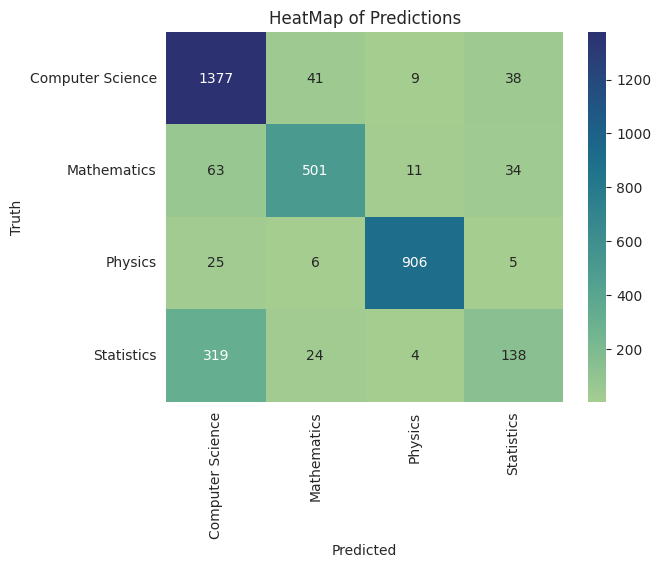

In [48]:
predictSubject(X_test, y_test, 
            "/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/svm.pkl",
            "/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/vectorizer.pkl")

#Multinomial Function (Naive Bayes algorithm)

In [49]:
# create a custom sklearn pipeline
from sklearn.naive_bayes import MultinomialNB

bayes = MultinomialNB()
bayes.fit(X_train_vec, y_train)

with open("/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/naiveBayes.pkl", "wb") as f:
    f.write(pickle.dumps(bayes))

bayes

MultinomialNB()

Prediction Sample :  [0 2 2 ... 0 0 0]
Confusion Matrix
[[1455    6    4    0]
 [ 204  385   20    0]
 [  59    0  883    0]
 [ 483    0    2    0]]
Classification report
              precision    recall  f1-score   support

           0       0.66      0.99      0.79      1465
           1       0.98      0.63      0.77       609
           2       0.97      0.94      0.95       942
           3       0.00      0.00      0.00       485

    accuracy                           0.78      3501
   macro avg       0.65      0.64      0.63      3501
weighted avg       0.71      0.78      0.72      3501


Accuracy :  0.7777777777777778
Precision :  0.7777777777777778
Recall :  0.7777777777777778


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


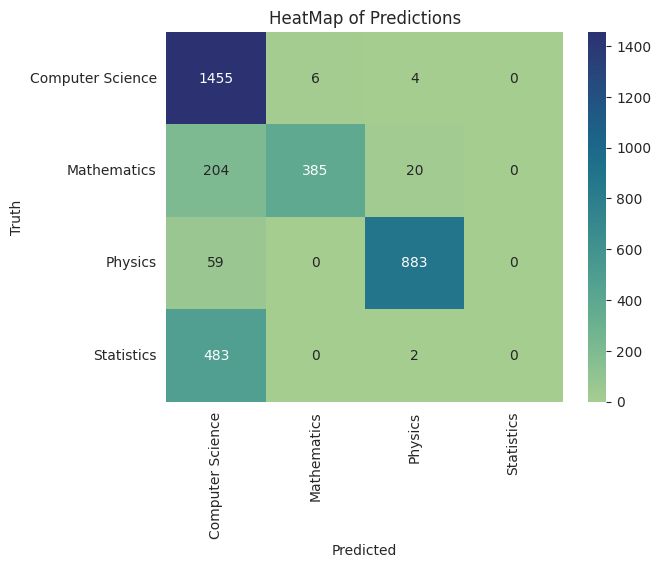

In [50]:
predictSubject(X_test, y_test, 
            "/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/naiveBayes.pkl",
            "/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/vectorizer.pkl")

#Comparing Between trainig data and data scraped from pureportal of Coventry

In [56]:
papers = pd.read_json("/content/drive/MyDrive/Nikesh_Web_Clawer/model/papers1.json")

papers.head()

,link,title,journal,journalLink,date,volume,numberofpages,type_classification,doi,authors,tags,coventryAuthors,abstract,pages
0,https://pureportal.coventry.ac.uk/en/publicati...,Association of minimally processed and ultra-p...,Association of minimally processed and ultra-p...,https://pureportal.coventry.ac.uk/en/publicati...,2023-02-15,(In-Press),30.0,Article,https://doi.org/10.20960/nh.04270,"[Leonardo V Silva, Pedro Pugliesi Abdalla, Luc...","[Non-communicable diseases, Nutrition, Nutriti...",[https://pureportal.coventry.ac.uk/en/persons/...,food type represents higher odds of having obe...,NaN
1,https://pureportal.coventry.ac.uk/en/publicati...,Association of the COVID-19 pandemic on stroke...,Association of the COVID-19 pandemic on stroke...,https://pureportal.coventry.ac.uk/en/publicati...,2023-03-17,13,13.0,Article,https://doi.org/10.1136/bmjopen-2022-062734,"[Rachel A Van Dusen, Kiera Abernethy, Nagendra...","[Cardiovascular medicine, 1506, 2474, 1683, St...",[https://pureportal.coventry.ac.uk/en/persons/...,Objectives: The COVID-19 pandemic has highligh...,NaN
2,https://pureportal.coventry.ac.uk/en/publicati...,"Associations Between Perceived Social Support,...","Associations Between Perceived Social Support,...",https://pureportal.coventry.ac.uk/en/publicati...,2023-01-01,40,16.0,Article,https://doi.org/10.1123/apaq.2021-0198,"[Ming Hui Li, Jane Jie Yu, Stephen Heung Sang ...","[adolescents, special schools, psychological h...",[https://pureportal.coventry.ac.uk/en/persons/...,This study aimed to examine the associations b...,126-141
3,https://pureportal.coventry.ac.uk/en/publicati...,Associations between sleep-related heart rate ...,Associations between sleep-related heart rate ...,https://pureportal.coventry.ac.uk/en/publicati...,2023-01-01,101,12.0,Review article,https://doi.org/10.1016/j.sleep.2022.10.018,"[Arron Taylor Lund Correia, Gosia Lipinska, H....","[Anxiety, Autonomic nervous system, Depression...",[https://pureportal.coventry.ac.uk/en/persons/...,There is a bidirectional relationship between ...,106-117
4,https://pureportal.coventry.ac.uk/en/publicati...,A stochastic model of edge-localized modes in ...,A stochastic model of edge-localized modes in ...,https://pureportal.coventry.ac.uk/en/publicati...,2023-02-20,381,16.0,Article,https://doi.org/10.1098/rsta.2021.0226,"[Eun-jin Kim, Rainer Hollerbach]","[High-confinement mode, statistical theory, se...",[https://pureportal.coventry.ac.uk/en/persons/...,Magnetically confined plasmas are far from equ...,NaN


In [61]:
ind = 100
print(papers.iloc[ind].tags)
papers.iloc[ind].abstract

['Augmented reality', 'Head-mounted displays', 'Design requirements', 'User-centred design', 'Situation awareness']


'Augmented reality (AR) capable head-mounted displays (HMDs) have been proposed as technological enablers of several complex future flight concepts, which will bring accompanying pilot situation awareness (SA) and operational safety enhancements. However, relevant aviation design guidance concerning the implementation of modern HMD technologies and AR symbology is sparse. Consequently, the current study describes an SA grounded user-requirements analysis of operational applications for HMD technologies and AR symbology, with the intention of providing inputs for future designs of commercial aviation systems. In addition, insights from the study are relevant for AR design more generally. Endsley’s three-level SA model (1988) was applied as a framework to focus group discussions with eleven aviation subject matter experts. Thematic analysis highlighted multiple operational scenarios where HMD technology and AR may enhance SA, along with the requirements of the technologies to provide the

In [62]:
names = ['Computer Science', 'Mathematics', 'Physics', 'Statistics']

pred = predictUnseen([papers.iloc[ind].abstract], '/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/naiveBayes.pkl',
                     '/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/vectorizer.pkl')
names[pred[0]]

'Computer Science'

In [79]:
ind = 300
print(papers.iloc[ind].tags)
papers.iloc[ind].abstract

['Mineralogy', 'Muribaculaceae', 'Acidic mine', 'Acidophiles', 'Sulfide']


'The microbial ecology of acidic mine and sulfide cave ecosystems is well characterised with respect to aquatic communities, typically revealing low taxonomic complexity and dominance by a relatively limited number of cosmopolitan acidophilic bacterial and archaeal taxa. Whilst pH, temperature, and geochemistry are recognised drivers of diversity in these ecosystems, the specific question of a possible influence of substratum mineralogy on microbial community composition remains unanswered. Here we address this void, using 81subterranean mineral samples from a low temperature abandoned, acidic, sulfide ore mine system at Mynydd Parys (Parys Mountain in English), Wales, UK. Four primary and 15 secondary minerals were identified via x-ray diffraction, each sample containing a maximum of five and an average of two minerals. The mineralogy of primary (e.g. pyrite and quartz) and secondary (e.g. melanterite and pisanite) minerals was significantly correlated with prokaryotic community struc

In [80]:
names = ['Computer Science', 'Mathematics', 'Physics', 'Statistics']

pred = predictUnseen([papers.iloc[ind].abstract], '/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/naiveBayes.pkl', 
                     '/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/vectorizer.pkl')
names[pred[0]]

'Computer Science'

In [65]:
ind = 120
print(papers.iloc[ind].tags)
papers.iloc[ind].abstract

['graphene', 'PDMS', 'ball milling', 'APTES', 'nanocomposite film']


'In recent years, the use of nano-fillers in flexible polymer matrix to prepare highly flexible, stretchable, and multifunctional product has been widely studied. However, the uneven dispersion of nano-fillers in polymer matrix is an important factor hindering their performance. In this study, a method to prepare graphene nanosheets by ball milling and modification with the silane coupling agent APTES is reported, and this method can reduce the thickness of the nanosheets, improving the dispersion effect and compatibility of the nanosheets in the PDMS matrix. The mechanical and conductive properties of the prepared composite films were further analyzed. The morphology showed that our modified graphene (MGE and BMGE) are more evenly dispersed in the PDMS matrix compared to the unmodified graphene (GNP). The MGE/PDMS composite film has significantly improved electrical conductivity. It has a wide sensing range (up to 48%), high sensitivity (GF of 152 in the 20-40% strain range) and relia

In [66]:
names = ['Computer Science', 'Mathematics', 'Physics', 'Statistics']

pred = predictUnseen([papers.iloc[ind].abstract], '/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/svm.pkl',
                     '/content/drive/MyDrive/Nikesh_Web_Clawer/model/paperClassification/vectorizer.pkl')
names[pred[0]]

'Physics'